## IPCA 
* Orgão Responsável: IBGE
* Divulgação: Nos primeiros 10 dias do úteis do mês. Referência do mês anterior. 

## IPCA-15 - Prévia do IPCA
* Orgão Responsável: IBGE
* Divulgação: Nos ultimos 10 dias do mês. Referência do Mês Corrente. 
* De 10 a 15 dias antes do IPCA

## INPC 
* Orgão Responsável: IBGE
* Divulgação: Nos primeiros 10 dias do úteis do mês. Referência do mês anterior. 

## INCC-DI - Indice Nacional da Construção Civíl
* Orgão Responsável: Fundação Gentulio Vargas (FGV)
* Divulgação: Nos primeiros 10 dias úteis do mês. Referência do mês anterior.
* Período: Entre o primeiro e último dia do mês de referência 

## INCC-10 - Prévia do INCC
* Orgão Responsável: Fundação Gentulio Vargas (FGV)
* Divulgacão: Segunda quinzena do mês de referência.
* Período de Medição: Entre o dia 11 do mês anterior e o dia 10 do mês de referência

## INCC-M - Indice Nacional da Construção Civíl - Mercado
* Orgão Responsável: Fundação Gentulio Vargas (FGV)
* Divulgação: Final de cada mês de referência
* Período de Medição: Entre o dia 21 do mês anterior e o dia 20 do mês de referência

## IPA-DI - Indice do Produtor Amplo

* Orgão Responsável: Fundação Gentulio Vargas (FGV)
* Divulgação: Final de cada mês de referência
* Período de Medição: Entre o dia 21 do mês anterior e o dia 20 do mês de referência

## IPA-10 - Prévia do IPA
* Orgão Responsável: Fundação Gentulio Vargas (FGV)
* Divulgacão: Segunda quinzena do mês de referência.
* Período de Medição: Entre o dia 11 do mês anterior e o dia 10 do mês de referência

## IPA-M - Indice do Produtor Amplo - Mercado
* Orgão Responsável: Fundação Gentulio Vargas (FGV)
* Divulgação: Final de cada mês de referência
* Período de Medição: Entre o dia 21 do mês anterior e o dia 20 do mês de referência

## IPC - Índice de Preços ao Consumidor
* Orgão Responsável: Fundação Gentulio Vargas (FGV)
* Divulgação: Nos primeiros 10 dias úteis do mês. Referência do mês anterior.
* Período de Medição: Primeiro e Ultimo mês de Referência

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
import statsmodels.formula.api as smapi

In [2]:
#df = pd.read_csv("https://economia-popular-delivery-content-indices.s3.amazonaws.com/inflacao/inflacao.csv")
df = pd.read_csv("datasets/inflacao.csv")

In [3]:
df.head()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipa_variacao,ipa_acumulado_ano,ipc_fipe_variacao,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,salario_minimo,consolidado_ano
0,1980-01,1980,1,198001,6.62,6.62,0.0,0.0,0.0,0.0,...,7.31,7.31,4.48,4.48,4.70,4.70,0.0,0.0,2932.8,False
1,1980-02,1980,2,198002,4.62,11.54,0.0,0.0,0.0,0.0,...,3.69,11.00,3.35,7.83,9.53,14.23,0.0,0.0,2932.8,False
2,1980-03,1980,3,198003,6.04,18.27,0.0,0.0,0.0,0.0,...,6.32,17.32,4.34,12.17,12.80,27.03,0.0,0.0,2932.8,False
3,1980-04,1980,4,198004,5.29,24.53,0.0,0.0,0.0,0.0,...,6.69,24.01,3.93,16.10,3.13,30.16,0.0,0.0,2932.8,False
4,1980-05,1980,5,198005,5.70,31.63,0.0,0.0,0.0,0.0,...,7.32,31.33,6.52,22.62,4.86,35.02,0.0,0.0,4149.6,False


# Prevendo o IPCA consolidado através da prévia do IPCA15

In [4]:
cols = ['referencia', 'ipca_variacao', 'ipca15_variacao']
df_corr = df[cols]

In [5]:
df_corr.head()

,referencia,ipca_variacao,ipca15_variacao
0,1980-01,6.62,0.0
1,1980-02,4.62,0.0
2,1980-03,6.04,0.0
3,1980-04,5.29,0.0
4,1980-05,5.70,0.0


In [6]:
df_corr.corr()

/var/folders/ht/zw2nx83j6w387qgthkq66lg80000gn/T/ipykernel_81160/191381569.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr.corr()


,ipca_variacao,ipca15_variacao
ipca_variacao,1.000000,-0.327672
ipca15_variacao,-0.327672,1.000000


In [7]:
df_corr[cols] = df_corr[cols].replace(['0', 0], np.nan)

/var/folders/ht/zw2nx83j6w387qgthkq66lg80000gn/T/ipykernel_81160/4194937642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[cols] = df_corr[cols].replace(['0', 0], np.nan)


In [8]:
df_corr

,referencia,ipca_variacao,ipca15_variacao
0,1980-01,6.62,NaN
1,1980-02,4.62,NaN
2,1980-03,6.04,NaN
3,1980-04,5.29,NaN
4,1980-05,5.70,NaN
...,...,...,...
512,2022-09,-0.29,-0.37
513,2022-10,0.59,0.16
514,2022-11,0.41,0.53
515,2022-12,0.62,0.52


In [9]:
df_corr = df_corr.dropna()

In [10]:
df_corr.shape

(272, 3)

In [11]:
df_corr.head()

,referencia,ipca_variacao,ipca15_variacao
244,2000-05,0.01,0.09
245,2000-06,0.23,0.08
246,2000-07,1.61,0.78
247,2000-08,1.31,1.99
248,2000-09,0.23,0.45


In [12]:
df_corr.tail()

,referencia,ipca_variacao,ipca15_variacao
512,2022-09,-0.29,-0.37
513,2022-10,0.59,0.16
514,2022-11,0.41,0.53
515,2022-12,0.62,0.52
516,2023-01,0.53,0.55


In [13]:
df_corr.corr()

/var/folders/ht/zw2nx83j6w387qgthkq66lg80000gn/T/ipykernel_81160/191381569.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr.corr()


,ipca_variacao,ipca15_variacao
ipca_variacao,1.000000,0.855269
ipca15_variacao,0.855269,1.000000


In [14]:
stats.pearsonr(
    df_corr['ipca_variacao'], 
    df_corr['ipca15_variacao'], 
)

PearsonRResult(statistic=0.8552693287199877, pvalue=4.610914567462448e-79)

* 0.85% de correlação é considerada alta 

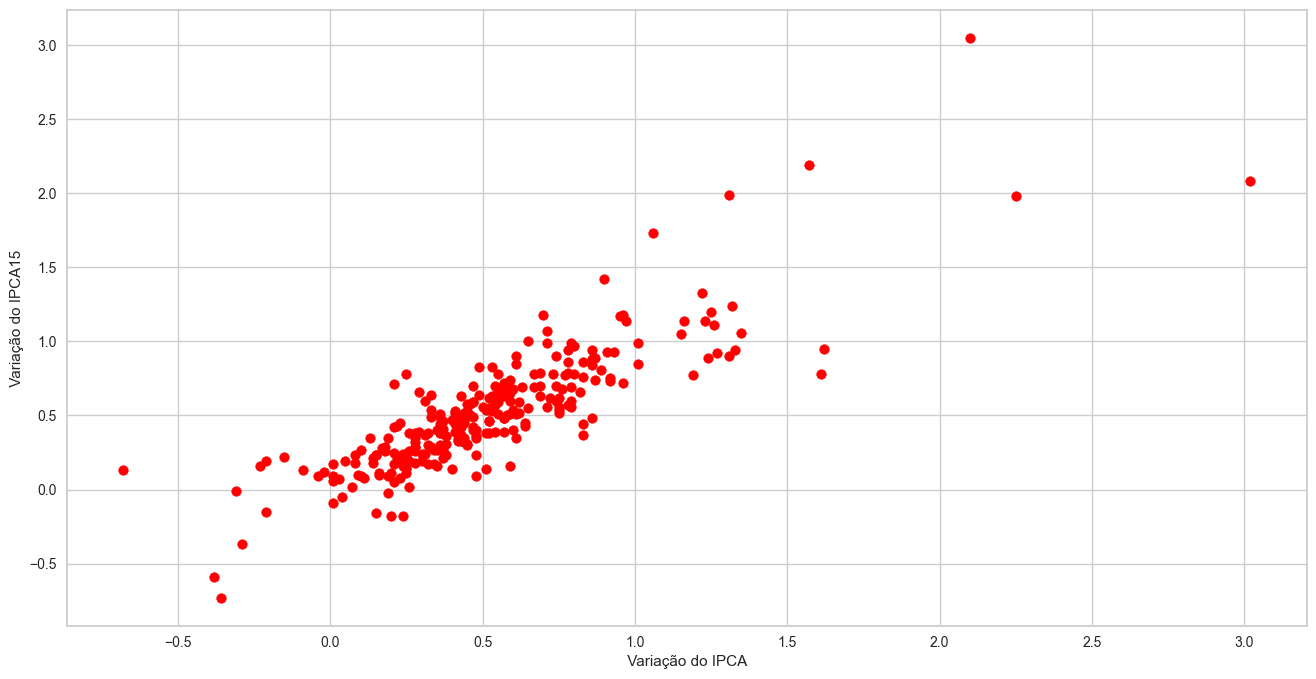

In [15]:
plt.figure(figsize = (16,8))
plt.scatter(
    df_corr['ipca_variacao'], 
    df_corr['ipca15_variacao'], 
    c='red')
plt.xlabel(" Variação do IPCA ")
plt.ylabel(" Variação do IPCA15 ")
plt.show()

#### Encontrando a Malhor Reta para a progressão

In [16]:
reg = LinearRegression()

#### Transformando os Series do Pandas em Arrays para fazer o fit dos dados. 

In [17]:
reg.fit(
    df_corr['ipca15_variacao'].values.reshape(-1, 1), 
    df_corr['ipca_variacao'].values.reshape(-1, 1)
)

LinearRegression()

In [18]:
reg.coef_

array([[0.84639256]])

#### Melhor possibilidade de onde a reta vai cortar o eixo. 

In [19]:
reg.intercept_

array([0.0804627])

#### Testando o coeficiente de interceptação para traçar o gráfico linearmente

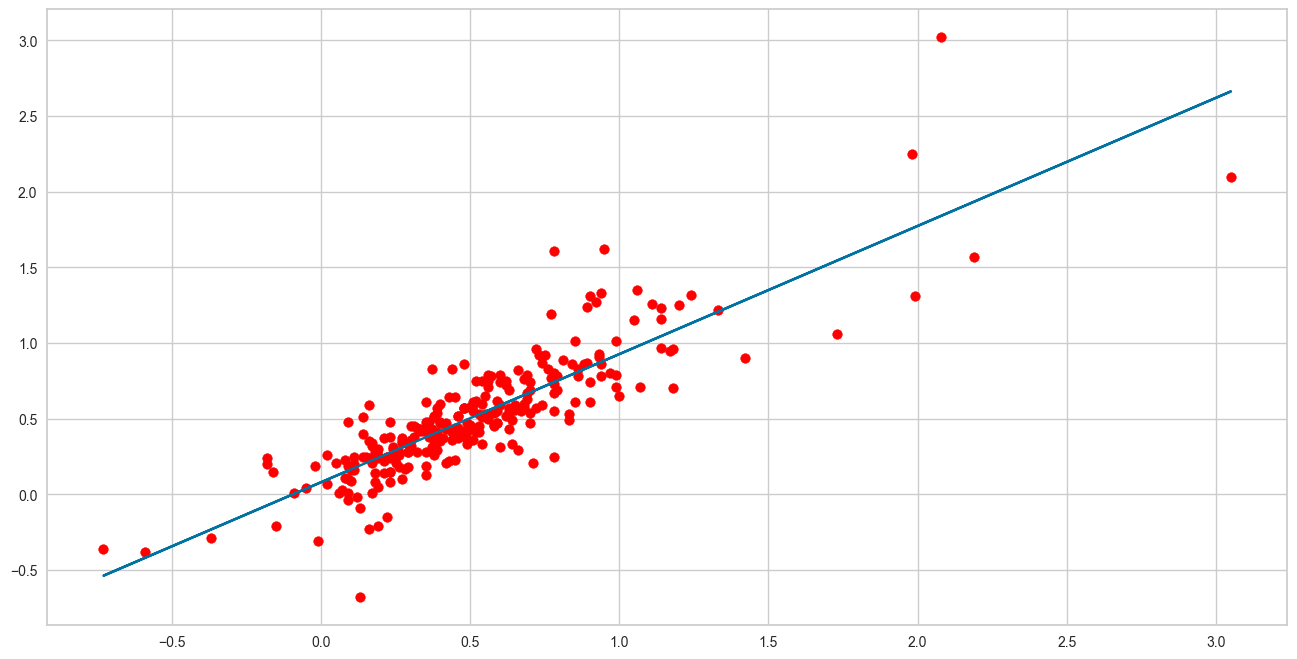

In [20]:
plt.figure(figsize = (16,8))
plt.scatter(df_corr['ipca15_variacao'], df_corr['ipca_variacao'], c="red")
x = np.array(df_corr['ipca15_variacao'])
y = reg.intercept_ + x * reg.coef_
plt.plot(x, y[0], "b")
plt.show()

In [21]:
X = df_corr['ipca_variacao']
y = df_corr['ipca15_variacao']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        ipca15_variacao   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     735.5
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           4.61e-79
Time:                        15:58:50   Log-Likelihood:                 36.335
No. Observations:                 272   AIC:                            -68.67
Df Residuals:                     270   BIC:                            -61.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0685      0.021      3.280

#### Resultado do Modelo
O R2 é de 0.727.
Isso significa que 73% do comportamento da variável `ipca_variacao` é explicado pela variável `ipca15_variacao`.
Nosso p-valor é de 0.001. Isso significa que `não`podemos aceitar a hipótese nula. Se o mesmo estivesse alto, aceitariamos a hipótese nula e chegariamos a conclusão de que os dados  são bons o suficiente para gerar um modelo bom.

# Treinando e ajustando o modelo de regressão

## Criando dataset de treino x teste

In [22]:
X = df_corr['ipca15_variacao'].values.reshape(-1, 1)

In [23]:
y = df_corr['ipca_variacao'].values.reshape(-1, 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, shuffle=False)

In [25]:
X_train.shape

(231, 1)

In [26]:
X_test.shape

(41, 1)

## Treinando o modelo de regressão

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
regressor.intercept_

array([0.07991911])

In [30]:
regressor.coef_

array([[0.84558208]])

## Teste do Modelo

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
df_preds = pd.DataFrame({'Valor Real': y_test.squeeze(), 'Predicted': y_pred.squeeze()})

In [33]:
df_preds.head(20)

,Valor Real,Predicted
0,-0.04,0.156021
1,0.10,0.156021
2,0.51,0.198301
3,1.15,0.967780
4,0.21,0.680282
5,0.25,0.265947
6,0.07,0.096831
7,-0.31,0.071463
8,-0.38,-0.418974
9,0.26,0.096831


##### MAE - Mean Absolute Error 

**Erro Absoluto Médio (MAE)**: Subtraímos os valores previstos dos valores reais, obtendo os erros, somamos os valores absolutos desses erros e obtemos sua média. Essa métrica dá uma noção do erro geral para cada previsão do modelo, quanto menor (mais próximo de 0) melhor.

##### MSE - Mean Squared Error
**Erro Quadrático Médio (MSE)** É semelhante à métrica MAE, mas eleva ao quadrado os valores absolutos dos erros. Além disso, como no MAE, quanto menor ou mais próximo de 0, melhor. O valor MSE é elevado ao quadrado para tornar os erros ainda maiores. Uma coisa a ter bastante atenção é que costuma ser uma métrica difícil de interpretar devido ao tamanho de seus valores e ao fato de não estarem na mesma escala dos dados.

##### RMSE - Root Mean Squared Error
**Raiz quadrada do erro-médio (RMSE)** : Tenta resolver o problema de interpretação levantado com o MSE obtendo a raiz quadrada de seu valor final, de modo a escalá-lo de volta para as mesmas unidades dos dados. É mais fácil de interpretar e bom quando precisamos exibir ou mostrar o valor real dos dados com o erro. Ele mostra o quanto os dados podem variar, portanto, se tivermos um RMSE de 4,35, nosso modelo pode cometer um erro porque adicionou 4,35 ao valor real ou precisou de 4,35 para chegar ao valor real. Quanto mais próximo de 0, melhor também.


In [34]:
Referencia_train, Referencia_test, ipca_train, ipca_test = train_test_split(df_corr['referencia'], df_corr['ipca_variacao'], test_size = 0.15, random_state = 0, shuffle=False)

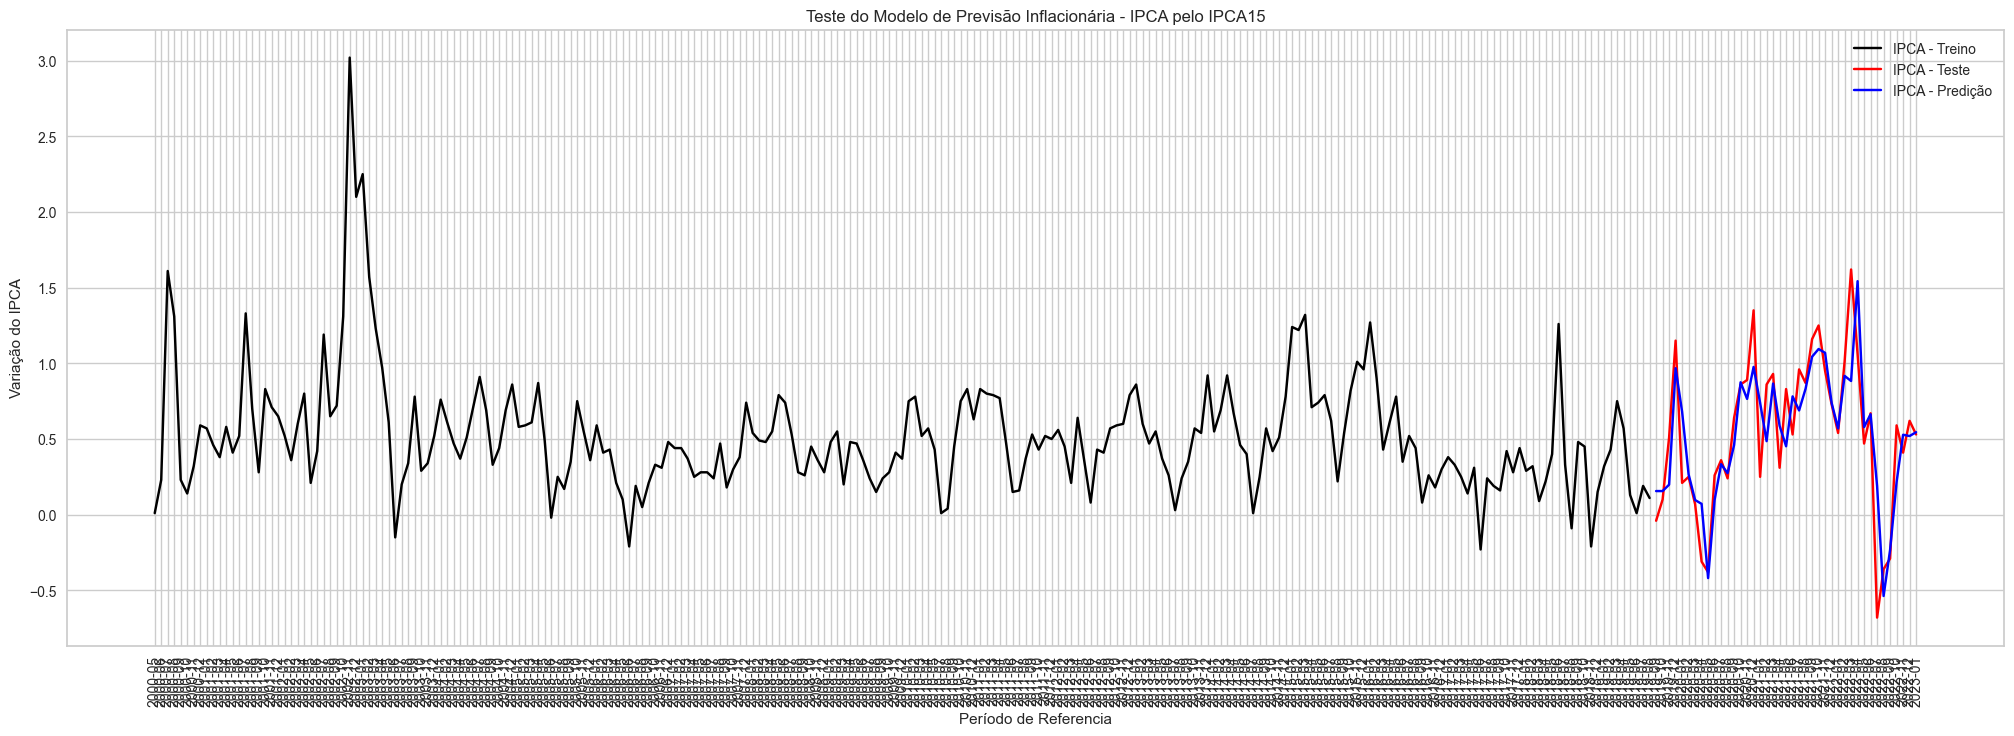

In [35]:
plt.figure(figsize=(25, 8))
plt.plot(Referencia_train, ipca_train, label="IPCA - Treino", color='black')
plt.plot(Referencia_test, ipca_test, label="IPCA - Teste", color='red')
plt.plot(Referencia_test, y_pred.squeeze(), label="IPCA - Predição", color='blue')
plt.xlabel("Período de Referencia")
plt.ylabel("Variação do IPCA")
plt.xticks(rotation = 90)

plt.title("Teste do Modelo de Previsão Inflacionária - IPCA pelo IPCA15")
plt.legend()
plt.show()

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [37]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.20
Mean squared error: 0.08
Root mean squared error: 0.28


### Perguntando ao Modelo

> Quanto será o IPCA do mês onde o IPCA15 for de 0.32%?

In [38]:
regressor.predict([[0.32]])

array([[0.35050538]])

## Comparando com o RandomForestRegressor

In [39]:
y_train.shape[0]

231

In [40]:
regr_randomforest = RandomForestRegressor(min_samples_leaf=15 ,random_state=0, n_jobs=-1, criterion="squared_error", max_depth=32)

In [41]:
regr_randomforest.fit(X_train, y_train.ravel())

RandomForestRegressor(max_depth=32, min_samples_leaf=15, n_jobs=-1,
                      random_state=0)

### Teste do Modelo com Random Forest

In [42]:
y_pred_randomforest = regr_randomforest.predict(X_test)

In [43]:
df_preds_randomforest = pd.DataFrame({'Valor Real': y_test.squeeze(), 'RandomForest Pred': y_pred_randomforest.squeeze()})

In [44]:
df_preds_randomforest.head(10)

,Valor Real,RandomForest Pred
0,-0.04,0.142088
1,0.10,0.142088
2,0.51,0.156606
3,1.15,1.139188
4,0.21,0.633093
5,0.25,0.221553
6,0.07,0.142088
7,-0.31,0.142088
8,-0.38,0.142088
9,0.26,0.142088


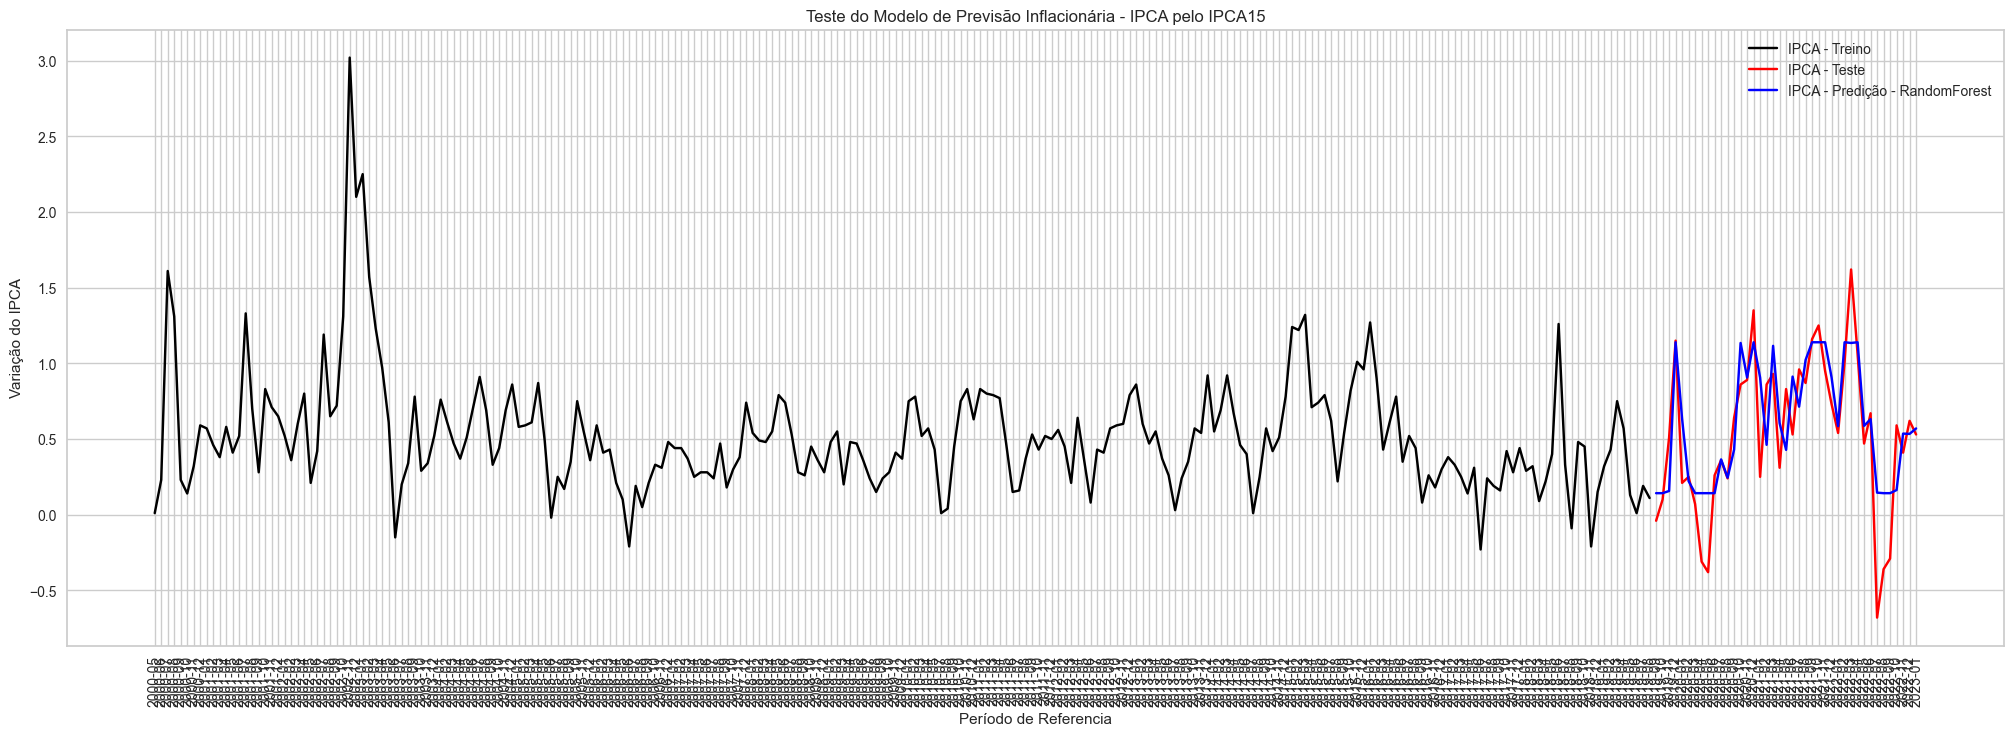

In [45]:
plt.figure(figsize=(25, 8))
plt.plot(Referencia_train, ipca_train, label="IPCA - Treino", color='black')
plt.plot(Referencia_test, ipca_test, label="IPCA - Teste", color='red')
plt.plot(Referencia_test, y_pred_randomforest.squeeze(), label="IPCA - Predição - RandomForest", color='blue')
plt.xlabel("Período de Referencia")
plt.ylabel("Variação do IPCA")
plt.xticks(rotation = 90)

plt.title("Teste do Modelo de Previsão Inflacionária - IPCA pelo IPCA15")
plt.legend()
plt.show()

In [46]:
mae_randomforest = mean_absolute_error(y_test, y_pred_randomforest)
mse_randomforest = mean_squared_error(y_test, y_pred_randomforest)
rmse_randomforest = np.sqrt(mse_randomforest)

In [47]:
print(f'Mean absolute error: {mae_randomforest:.2f}')
print(f'Mean squared error: {mse_randomforest:.2f}')
print(f'Root mean squared error: {rmse_randomforest:.2f}')

Mean absolute error: 0.23
Mean squared error: 0.09
Root mean squared error: 0.30


## Comparativos de Performance

### Tabela de Predição 

In [48]:
df_preds_total = pd.DataFrame({'Valor Real': y_test.squeeze(),'Linear Pred': y_pred.squeeze() ,'RandomForest Pred': y_pred_randomforest.squeeze()})

In [49]:
df_preds_total

,Valor Real,Linear Pred,RandomForest Pred
0,-0.04,0.156021,0.142088
1,0.10,0.156021,0.142088
2,0.51,0.198301,0.156606
3,1.15,0.967780,1.139188
4,0.21,0.680282,0.633093
5,0.25,0.265947,0.221553
6,0.07,0.096831,0.142088
7,-0.31,0.071463,0.142088
8,-0.38,-0.418974,0.142088
9,0.26,0.096831,0.142088


### Grafico de Série Histórica

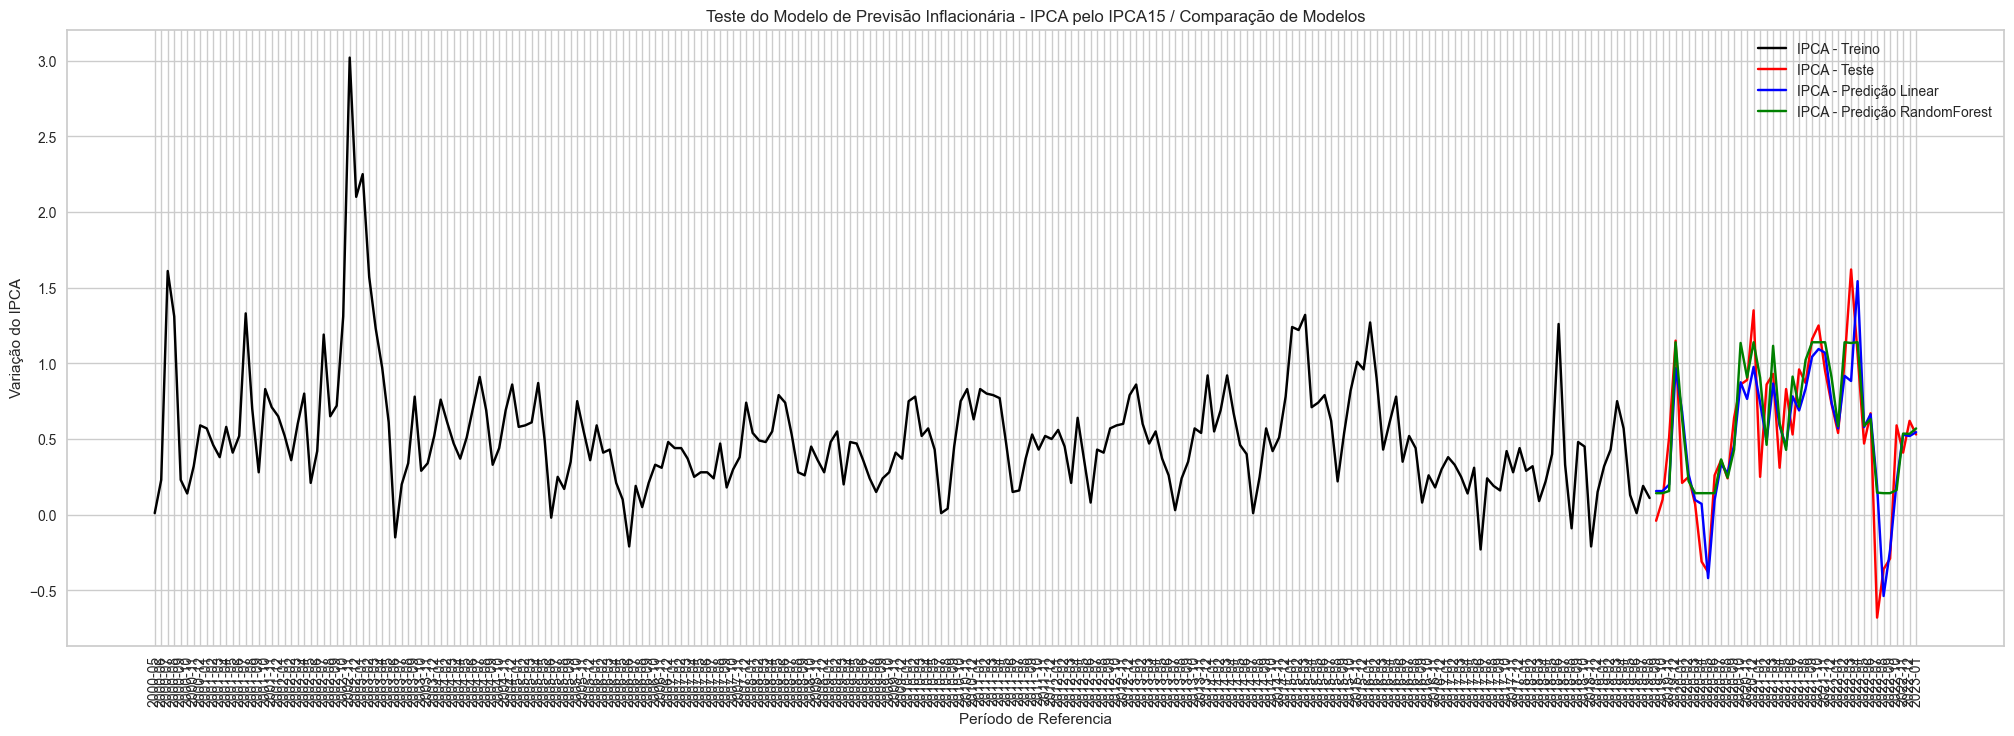

In [50]:
plt.figure(figsize=(25, 8))
plt.plot(Referencia_train, ipca_train, label="IPCA - Treino", color='black')
plt.plot(Referencia_test, ipca_test, label="IPCA - Teste", color='red')
plt.plot(Referencia_test, y_pred.squeeze(), label="IPCA - Predição Linear", color='blue')
plt.plot(Referencia_test, y_pred_randomforest.squeeze(), label="IPCA - Predição RandomForest", color='green')
plt.xlabel("Período de Referencia")
plt.ylabel("Variação do IPCA")
plt.xticks(rotation = 90)

plt.title("Teste do Modelo de Previsão Inflacionária - IPCA pelo IPCA15 / Comparação de Modelos")
plt.legend()
plt.show()

### MAE, MSE, RMSE

#### Linear Regression

In [51]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.20
Mean squared error: 0.08
Root mean squared error: 0.28


#### RandomForest

In [52]:
print(f'Mean absolute error: {mae_randomforest:.2f}')
print(f'Mean squared error: {mse_randomforest:.2f}')
print(f'Root mean squared error: {rmse_randomforest:.2f}')

Mean absolute error: 0.23
Mean squared error: 0.09
Root mean squared error: 0.30


### Qual seria o IPCA quando o IPCA15 for de 0.32??

#### Linear Regression

In [53]:
regressor.predict([[0.32]])

array([[0.35050538]])

#### RandomForest

In [54]:
regr_randomforest.predict([[0.32]])

array([0.3897699])

# Qual a Inflação do mês seguinte???
* No dia 24/02/2023 foi divulgado o IPCA de fevereiro que ficou em `0.76%`


In [55]:
previsao_ipca = regressor.predict([[0.76]])

In [56]:
float("{:.2f} ".format(previsao_ipca[0][0]))

0.72

In [57]:
previsao_ipca_randomforest = regr_randomforest.predict([[0.76]])

In [58]:
float("{:.2f} ".format(previsao_ipca_randomforest[0]))

0.91

In [59]:
y_pred = [Referencia_test.iloc[-1], "2023-02"]
x_pred = [ipca_test.iloc[-1], float("{:.2f} ".format(previsao_ipca[0][0]))]
x_pred_randomforest = [ipca_test.iloc[-1], float("{:.2f} ".format(previsao_ipca_randomforest[0]))]

* Adicionando o mês anterior e predição atual para link do grafico

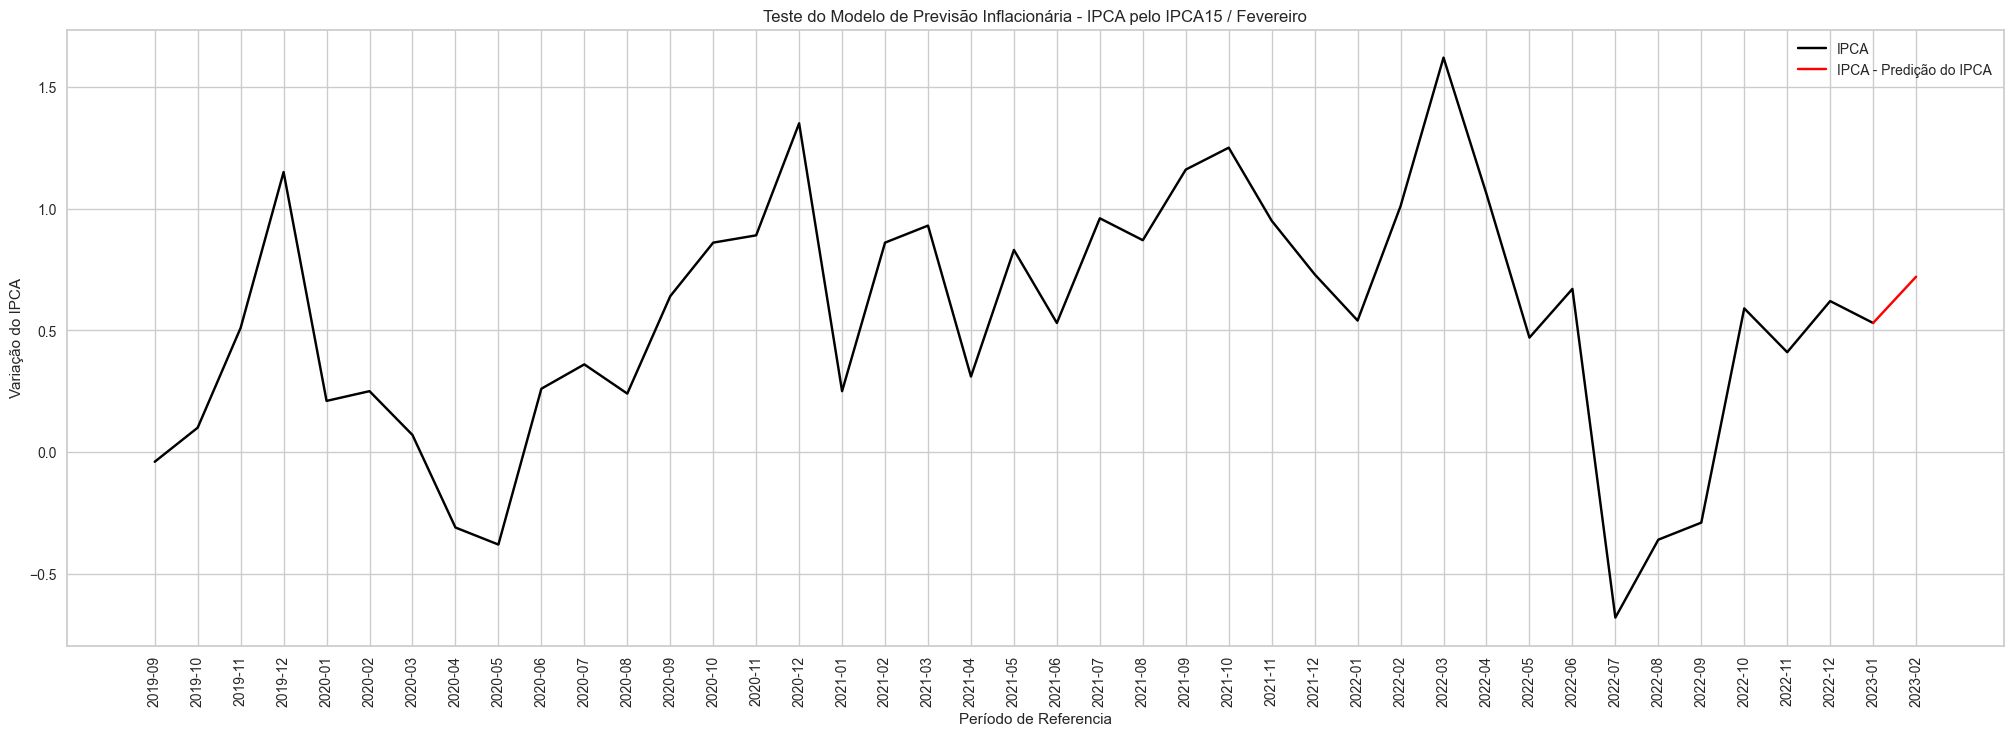

In [60]:
plt.figure(figsize=(25, 8))
plt.plot(Referencia_test, ipca_test, label="IPCA", color='black')
plt.plot(y_pred, x_pred, label="IPCA - Predição do IPCA", color='red')
plt.xlabel("Período de Referencia")
plt.ylabel("Variação do IPCA")
plt.xticks(rotation = 90)

plt.title("Teste do Modelo de Previsão Inflacionária - IPCA pelo IPCA15 / Fevereiro")
plt.legend()
plt.show()

#### Previsão de Inflação - Regressão 

In [61]:
float("{:.2f} ".format(previsao_ipca[0][0]))

0.72

#### Previsão de Inflação - RandomForest

In [62]:
float("{:.2f} ".format(previsao_ipca_randomforest[0]))

0.91

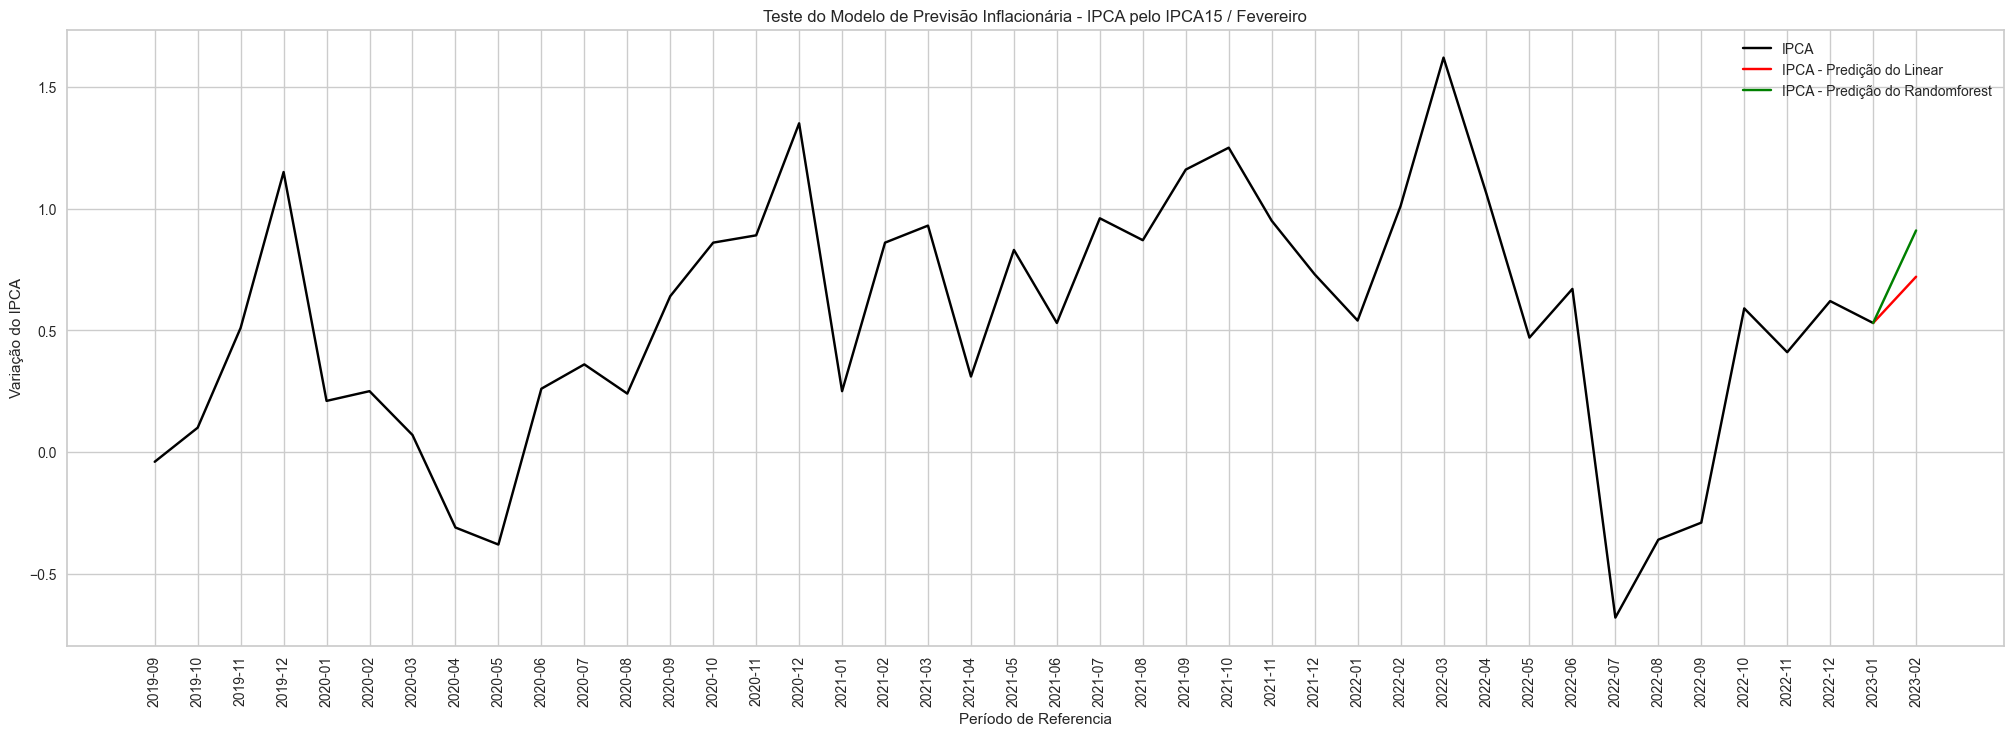

In [63]:
plt.figure(figsize=(25, 8))
plt.plot(Referencia_test, ipca_test, label="IPCA", color='black')
plt.plot(y_pred, x_pred, label="IPCA - Predição do Linear", color='red')
plt.plot(y_pred, x_pred_randomforest, label="IPCA - Predição do Randomforest", color='green')
plt.xlabel("Período de Referencia")
plt.ylabel("Variação do IPCA")
plt.xticks(rotation = 90)

plt.title("Teste do Modelo de Previsão Inflacionária - IPCA pelo IPCA15 / Fevereiro")
plt.legend()
plt.show()

### Adicionando o periodo do ano como variavel dependente na regressão 

In [99]:
df_multi = df.copy()

In [100]:
cols_multi =  ['referencia','ano','mes','ipca15_variacao','ipca_variacao'] 

In [101]:
df_multi[cols_multi] = df_multi[cols_multi].replace(['0', 0], np.nan)

In [102]:
df_multi = df_multi.dropna()

In [103]:
cols_multi_indeps = ['ano','mes','ipca15_variacao']
df_multi_indeps = df_multi[cols_multi_indeps]

In [108]:
df_multi_indeps.shape

(272, 3)

In [104]:
cols_multi_dep = ['ipca_variacao']
df_multi_dep = df_multi[cols_multi_dep]

In [109]:
df_multi_dep.shape

(272, 1)

In [114]:
X_Multi = df_multi_indeps.values

In [115]:
X_Multi.shape

(272, 3)

In [116]:
Y_Multi = df_multi_dep.values.reshape(-1, 1)

In [117]:
Y_Multi.shape

(272, 1)

#### Train Test

In [118]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_Multi, Y_Multi, test_size = 0.15, random_state = 0, shuffle=False)

#### Treinando o Modelo

In [119]:
regressor_multi = LinearRegression()

In [120]:
regressor_multi.fit(X_train_multi, y_train_multi)

LinearRegression()

In [125]:
y_pred_multi = regressor_multi.predict(X_test_multi)

In [126]:
df_preds_multi = pd.DataFrame({'Valor Real': y_test.squeeze(), 'Regression Multiple Pred': y_pred_multi.squeeze()})

In [127]:
df_preds_multi.head()

,Valor Real,Regression Multiple Pred
0,-0.04,0.137950
1,0.10,0.140256
2,0.51,0.184573
3,1.15,0.951478
4,0.21,0.637695
